In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
!unzip '/content/archive.zip'

Archive:  /content/archive.zip
  inflating: Crude Oil Prices Daily.xlsx  


In [3]:
Data = pd.read_excel('/content/Crude Oil Prices Daily.xlsx')
Data

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [4]:
Data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [5]:
Data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [6]:
Data.dropna(axis=0,inplace=True)
Data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [7]:
data_oil=Data.reset_index()['Closing Value']
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

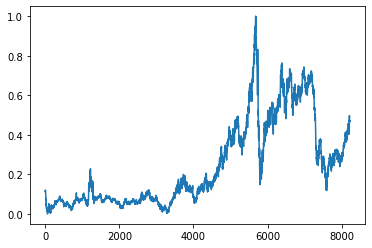

In [9]:
plt.plot(data_oil)

In [10]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [11]:
training_size,test_size

(5340, 2876)

In [12]:
train_data.shape

(5340, 1)

In [13]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY) 

In [14]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(2865, 10)
(2865,)


(None, None)

In [17]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [18]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [20]:
model= Sequential()

In [21]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [22]:
model.add(Dense(1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 11s 54ms/step - loss: 0.0022 - val_loss: 8.2103e-04
Epoch 2/50
84/84 [==============================] - 2s 27ms/step - loss: 1.2366e-04 - val_loss: 7.9669e-04
Epoch 3/50
84/84 [==============================] - 2s 27ms/step - loss: 1.2392e-04 - val_loss: 8.4637e-04
Epoch 4/50
84/84 [==============================] - 2s 26ms/step - loss: 1.2581e-04 - val_loss: 7.6430e-04
Epoch 5/50
84/84 [==============================] - 2s 26ms/step - loss: 1.1980e-04 - val_loss: 7.6820e-04
Epoch 6/50
84/84 [==============================] - 2s 26ms/step - loss: 1.3117e-04 - val_loss: 0.0014
Epoch 7/50
84/84 [==============================] - 2s 26ms/step - loss: 1.2179e-04 - val_loss: 7.4342e-04
Epoch 8/50
84/84 [==============================] - 2s 27ms/step - loss: 1.2232e-04 - val_loss: 7.8749e-04
Epoch 9/50
84/84 [==============================] - 2s 26ms/step - loss: 1.1299e-04 - val_loss: 0.0011
Epoch 10/50
84/84 [=============================

In [26]:
import tensorflow as tf

In [27]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

90/90 [==============================] - 1s 6ms/step


In [28]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

28.922868422516245

In [30]:
math.sqrt(mean_squared_error(ytest,test_predict))

76.91248059208631

In [31]:
from tensorflow.keras.models import load_model

In [32]:
model.save("crude_oil_ibm.h5")

!tar -zcvf crude-oil-price-prediction.tgz crude_oil_ibm.h5

crude_oil_ibm.h5


In [33]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 5.1 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 132 kB 53.2 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 9.9 MB 58.4 MB/s 
     |████████████████████████████████| 140 kB 60.7 MB/s 
     |████████████████████████████████| 956 kB 50.1 MB/s 
     |████████████████████████████████| 135 kB 54.3 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=4d06d1480160616320330f641fb76afc3ace66434a827a46caf65438b9730c5d
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=34e05b70ce6

In [34]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 51 kB 687 kB/s 
     |████████████████████████████████| 824 kB 26.8 MB/s 
     |████████████████████████████████| 133 kB 61.8 MB/s 
     |████████████████████████████████| 547 kB 44.3 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=f93c2b38be0c2acb903a1eb3c8852f58bf74e6742ef8740d9e836f32b71a6fe4
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=56e6545d71857995bfec38f2ad91a18f6979d3a84fce9b55b9d9218449d47a39
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [35]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"KaV_3TkCT6UHi6BB8P1qBqvpDKNkCLLor76vWllPRdCz"
     }

Client = APIClient(wml_credentials) 


Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [36]:
Client

In [37]:
Client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/770966e00b7140368ed57d4c14e8b68d:4821e1a7-5b82-469f-86e0-fe68349540c1::',
      'guid': '4821e1a7-5b82-469f-86e0-fe68349540c1',
      'name': 'Watson Machine Learning-9r',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'crude oil',
    'scope': {'bss_account_id': '770966e00b7140368ed57d4c14e8b68d'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '8e113108-0b47-4209-a814-b594f064b822',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': '482ee27f93d3487e985bbf4942d1154d',
        'api_key': 'SMHaqbcWKe7YQqLWNd_CkQPzEY32d2xDdNsjHBJ86Sw3',
        'secret_access_key': '4194767a6e5c4e055293b20f85892f8d87db0ccc496959b1',
        'service_id': 'ServiceId-c2191021-33a0-4b52-8436-f429e3e3c78f'},
       'editor': {'access_key_id': '4c7b41f6c9b54051878ac8a1f9df2670',
        'api_key

In [38]:
Client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------  ------------------------
ID                                    NAME       CREATED
7c472a47-2d81-4767-bac5-e45218390e87  crude oil  2022-11-17T10:27:35.219Z
------------------------------------  ---------  ------------------------


In [39]:
space_uid = "7c472a47-2d81-4767-bac5-e45218390e87"
space_uid

'7c472a47-2d81-4767-bac5-e45218390e87'

In [40]:
Client.set.default_space(space_uid)

'SUCCESS'

In [41]:
Client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [42]:
software_space_uid = Client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [43]:
model_details = Client.repository.store_model(model="crude-oil-price-prediction.tgz", meta_props={
    Client.repository.ModelMetaNames.NAME:"crude oil price prediction model",
    Client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    Client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [44]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T09:51:33.813Z',
  'id': '5793046f-df9a-407d-98dd-4a97f59457a1',
  'modified_at': '2022-11-18T09:51:38.010Z',
  'name': 'crude oil price prediction model',
  'owner': 'IBMid-66800097IO',
  'resource_key': '3c68a341-c147-4b65-88ca-03f76c26b09f',
  'space_id': '7c472a47-2d81-4767-bac5-e45218390e87'},
 'system': {'warnings': []}}

In [45]:
model_id = Client.repository.get_model_id(model_details)
model_id

'5793046f-df9a-407d-98dd-4a97f59457a1'

In [46]:
Client.repository.download(model_id,'CRUDE OIL PRICE PREDICTION_IBM_MODEL.tgz')

Successfully saved model content to file: 'CRUDE OIL PRICE PREDICTION_IBM_MODEL.tgz'


'/content/CRUDE OIL PRICE PREDICTION_IBM_MODEL.tgz'